Data source: https://www.kaggle.com/mirichoi0218/insurance/downloads/insurance.zip/1

# Introduction

Health insurance in India is a growing segment of India's economy. The Indian health system is one of the largest in the world, with the number of people it concerns: nearly 1.3 billion potential beneficiaries. The health industry in India has rapidly become one of the most important sectors in the country in terms of income and job creation. In 2018, one hundred million Indian households (500 million people) do not benefit from health coverage. In 2011, 3.9%[1] of India's gross domestic product was spent in the health sector.

According to the World Health Organization (WHO), this is among the lowest of the BRICS (Brazil, Russia, India, China, South Africa) economies. Policies are available that offer both individual and family cover. Out of this 3.9%, health insurance accounts for 5-10% of expenditure, employers account for around 9% while personal expenditure amounts to an astounding 82%.

In the year 2016, the NSSO released the report “Key Indicators of Social Consumption in India: Health” based on its 71st round of surveys. The survey carried out in the year 2014 found out that, more than 80% of Indians are not covered under any health insurance plan, and only 18% (government funded 12%) of the urban population and 14% (government funded 13%) of the rural population was covered under any form of health insurance.

India's public health expenditures are lower than those of other middle-income countries. In 2012, they accounted for 4% of GDP, which is half as much as in China with 5.1%. In terms of public health spending per capita, India ranks 184th out of 191 countries in 2012. Patients' remaining costs represent about 58% of the total.[4] The remaining costs borne by the patient represent an increasing share of the household budget, from 5% of this budget in 2000 to over 11% in 2004-2005.[5] On average, the remaining costs of poor households as a result of hospitalization accounted for 140% of their annual income in rural areas and 90% in urban areas.

This financial burden has been one of the main reasons for the introduction of health insurance covering the hospital costs of the poorest.

# Data Description:

The data at hand contains medical costs of people characterized by certain attributes.

# Domain:
Healthcare

# Context:
Leveraging customer information is paramount for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and
generate value out of such data can be an invaluable skill to have.

# Attribute Information:

- age : age of primary beneficiary
- sex : insurance contractor gender, female, male
- bmi : Body mass index, providing an understanding of body,
- weights that are relatively high or low relative to height,
- objective index of body weight (kg / m ^ 2) using the ratio of
- height to weight, ideally 18.5 to 24.9
- children : Number of children covered by health insurance /
- Number of dependents
- smoker : Smoking
- region : the beneficiary's residential area in the US, northeast,southeast, southwest, northwest.
- charges : Individual medical costs billed by health insurance.

# Problem Statement

Predict how much could be the insurance charges for a baneficiary based on the data provided using Linera Regression.

## Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

## Read the data into the notebook

In [3]:
df=pd.read_csv('insurance.csv')

## Basic EDA
* Find the shape of the data,data type of individual columns
* Check the presence of missing values
* Descriptive stats of numerical columns
* Find the distribution of numerical columns and the asssociated skeweness and presence of outliers 
* Distribution of categorical columns

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Check for missing value

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Checking the summary of dataframe

In [7]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


# Plot the Histograms

<AxesSubplot:xlabel='age', ylabel='Count'>

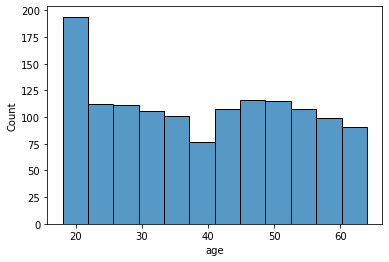

In [8]:
sns.histplot(x='age',data=df)

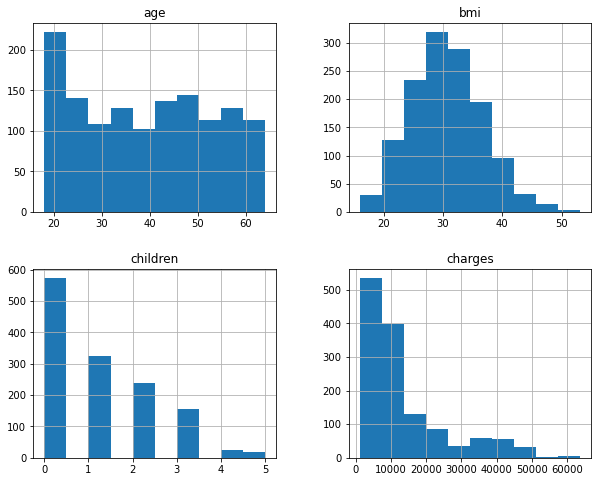

In [9]:
df.hist(figsize=(10,8));

Text(0.5, 1.0, 'Distribution of Charges')

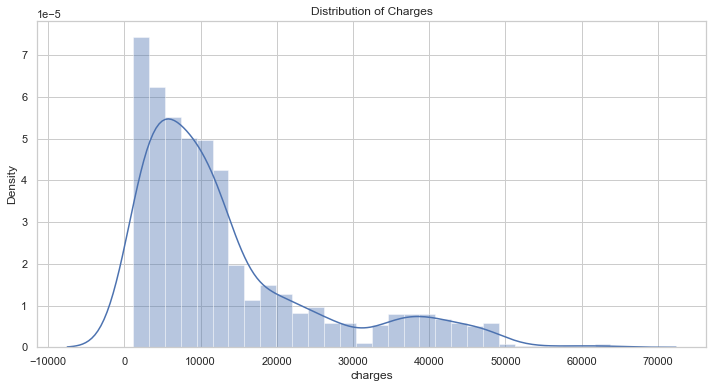

In [10]:
sns.set(style='whitegrid')
plt.subplots(1,1, figsize=(12, 6))
sns.distplot(df['charges'], kde = True, color = 'b')
plt.title('Distribution of Charges')

This distribution is right-skewed. To make it closer to normal we can apply natural log

<AxesSubplot:xlabel='charges', ylabel='Density'>

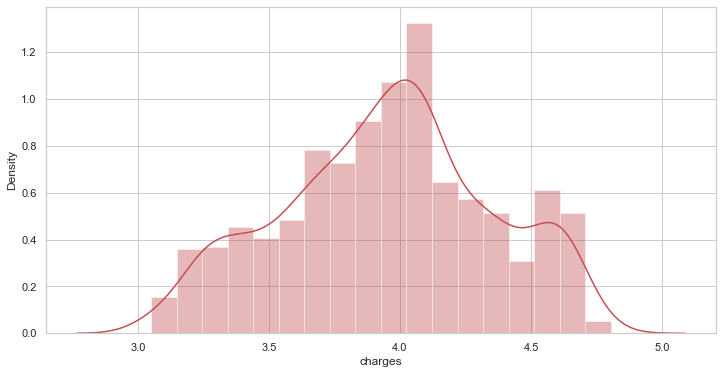

In [11]:
plt.subplots(1, 1, figsize=(12, 6))
sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )

In [12]:
stats.skew(df.age)

0.055610083072599126

In [13]:
stats.skew(df.bmi)

0.28372857291709386

In [14]:
stats.skew(df.charges)

1.5141797118745743

In [15]:
#skewness > +-1 Highly skewed
#skewness < 0.5 fairly skewed
#skewness = 0 symmetrical ( Normally/Uniformly distributed data)

<AxesSubplot:xlabel='charges'>

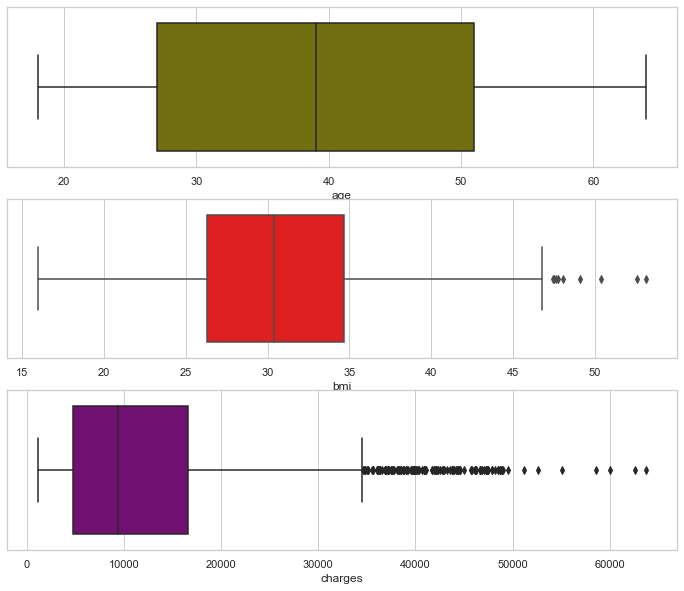

In [16]:
# Checking outliers

plt.figure(figsize=(12,10))
plt.subplot(3,1,1)
sns.boxplot(df.age,orient='h',color="olive")
plt.subplot(3,1,2)
sns.boxplot(df.bmi,orient='h',color="red")
plt.subplot(3,1,3)
sns.boxplot(df.charges,orient='h',color="purple")

# Check Outliers

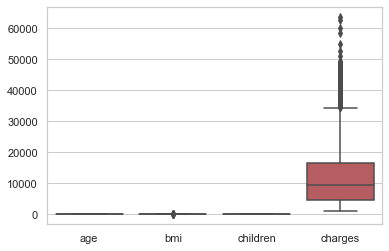

In [17]:
sns.boxplot(data=df);

# Outlier Treatment

In [18]:
def remove_outlier(col):
    sorted (col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    return lower_range,upper_range

In [19]:
lrbmi,urbmi=remove_outlier(df['bmi'])
df['bmi']=np.where(df['bmi']>urbmi,urbmi,df['bmi'])
df['bmi']=np.where(df['bmi']<lrbmi,lrbmi,df['bmi'])

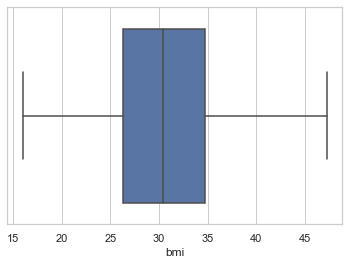

In [20]:
sns.boxplot(df['bmi']);

## Uni-variate distribution of every possible attribute

<AxesSubplot:xlabel='charges'>

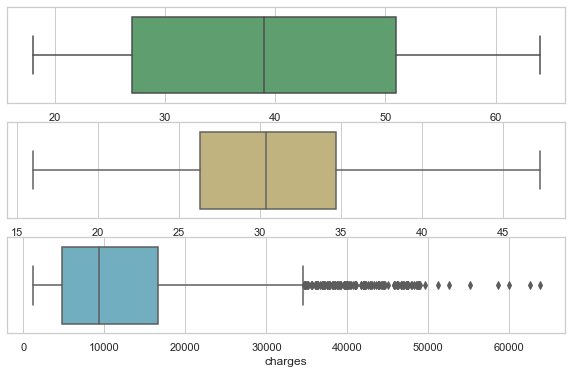

In [21]:
plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
sns.boxplot(df.age,orient='h',color='g')
plt.subplot(3,1,2)
sns.boxplot(df.bmi,orient='h',color='y')
plt.subplot(3,1,3)
sns.boxplot(df.charges,orient='h',color='c')

# Plot Count Plot

<AxesSubplot:xlabel='sex', ylabel='count'>

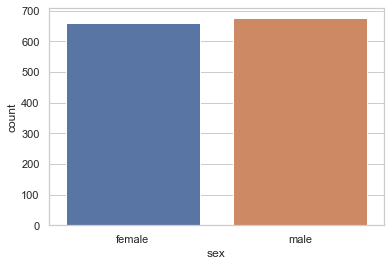

In [22]:
sns.countplot(x='sex',data=df)

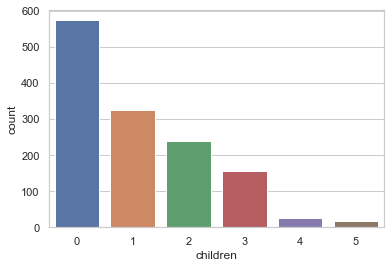

In [23]:
sns.countplot(x='children',data=df);

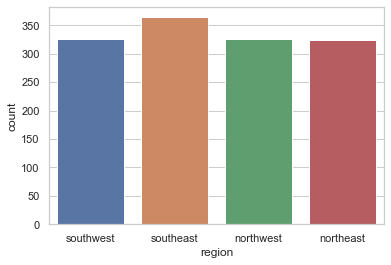

In [24]:
sns.countplot(x='region',data=df);

<AxesSubplot:xlabel='smoker', ylabel='count'>

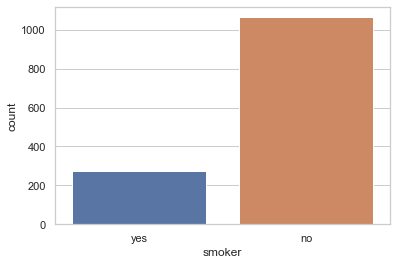

In [25]:
sns.countplot(x='smoker',data=df)

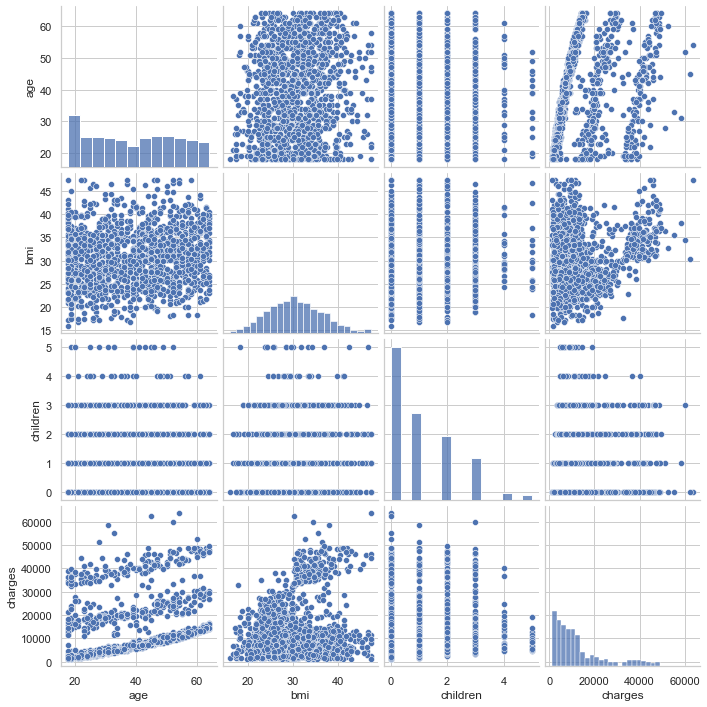

In [26]:
sns.pairplot(df)

In [27]:
df.cov()

,age,bmi,children,charges
age,197.401387,9.525202,0.719303,5.087480e+04
bmi,9.525202,36.686349,0.100030,1.459632e+04
children,0.719303,0.100030,1.453213,9.926742e+02
charges,50874.802298,14596.323097,992.674197,1.466524e+08


In [28]:
corelation=df.corr()
corelation

,age,bmi,children,charges
age,1.000000,0.111930,0.042469,0.299008
bmi,0.111930,1.000000,0.013700,0.198997
children,0.042469,0.013700,1.000000,0.067998
charges,0.299008,0.198997,0.067998,1.000000


### Bi-variate distribution of every possible attribute pair

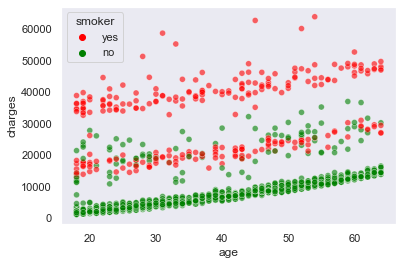

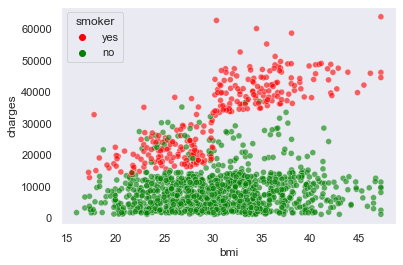

In [29]:
cols=['age','bmi']
for i in cols:
    sns.set(style="darkgrid")
    sns.scatterplot(x=i,y='charges',data=df,hue='smoker',palette=['red','green'],alpha=0.6)
    plt.grid()
    plt.show()

In [30]:
# Smoker pays more charges as increase in age and bmi.

In [31]:
df.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


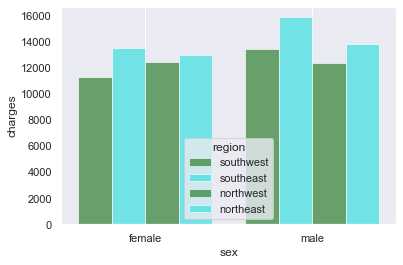

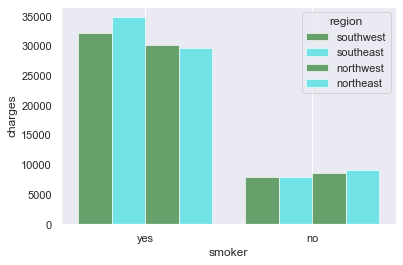

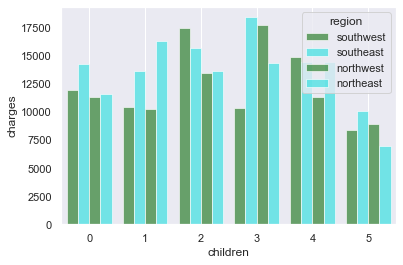

In [32]:
cols=['sex','smoker','children']
for i in cols:
    sns.set(style="darkgrid")
    sns.barplot(x=i,y='charges',data=df,hue='region',palette=['green','cyan'],alpha=0.6,ci=None)
    plt.grid()
    plt.show()

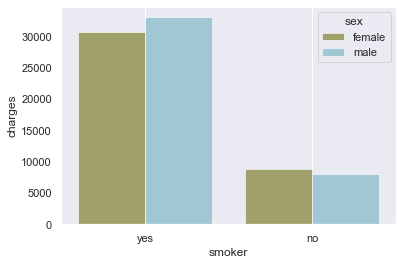

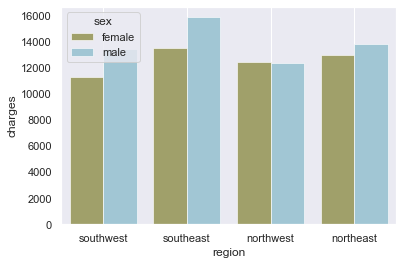

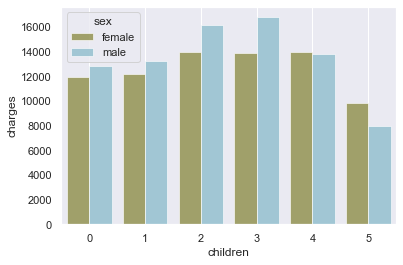

In [33]:
cols=['smoker','region','children']
for i in cols:
    sns.set(style="darkgrid")
    sns.barplot(x=i,y='charges',data=df,hue='sex',palette=['olive','c'],alpha=0.6,ci=None)
    plt.grid()
    plt.show()

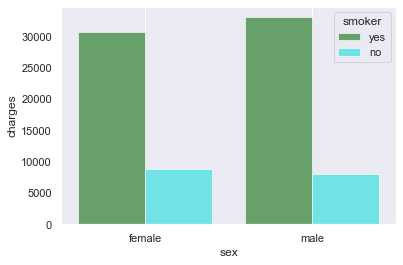

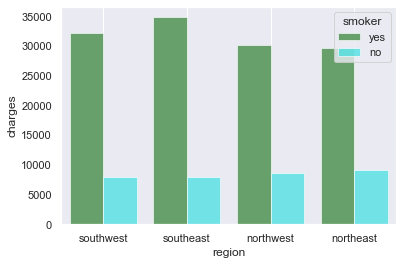

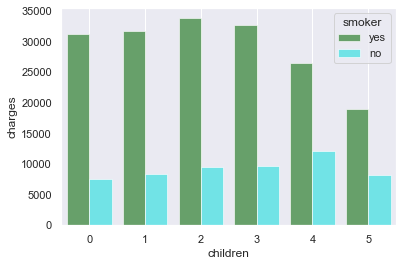

In [34]:
cols=['sex','region','children']
for i in cols:
    sns.set(style="darkgrid")
    sns.barplot(x=i,y='charges',data=df,hue='smoker',palette=['green','cyan'],alpha=0.6,ci=None)
    plt.grid()
    plt.show()

In [35]:
# Male smoker, Southeast region people and having two childer people pays highest charges.

<AxesSubplot:xlabel='region', ylabel='charges'>

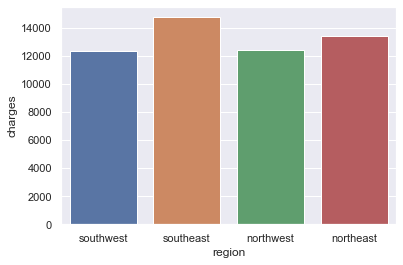

In [36]:
sns.barplot(y='charges', x='region', data=df,ci=None)

So overall the highest medical charges are in the Southeast and the lowest are in the Southwest. Taking into account certain factors (sex, smoking, having children) let's see how it changes by region

<AxesSubplot:xlabel='region', ylabel='charges'>

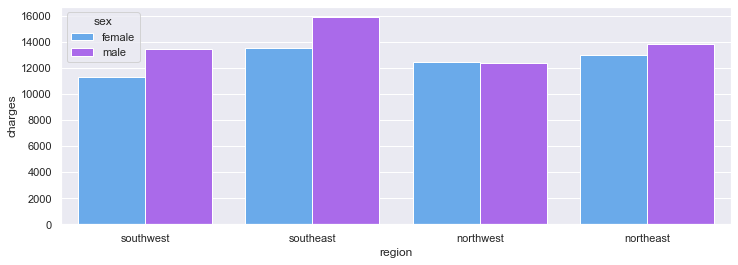

In [37]:
plt.subplots(1, 1, figsize=(12, 4))
sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool',ci=None)

<AxesSubplot:xlabel='region', ylabel='charges'>

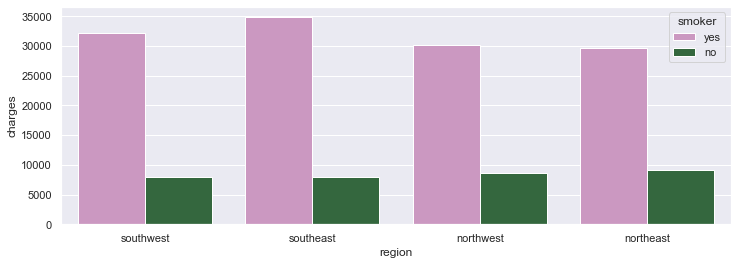

In [38]:
plt.subplots(1,1, figsize=(12,4))
sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='cubehelix_r',ci=None)

<AxesSubplot:xlabel='region', ylabel='charges'>

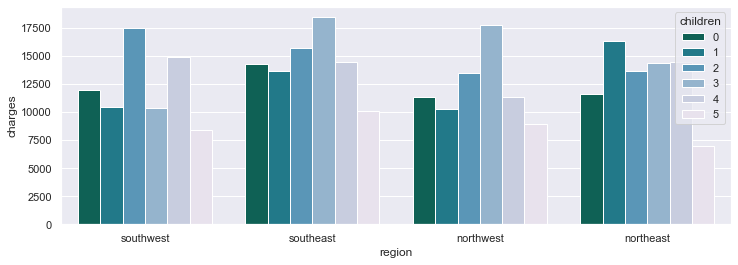

In [39]:
plt.subplots(1, 1, figsize=(12, 4))
sns.barplot(x='region', y='charges', hue='children', data=df, palette='PuBuGn_r',ci=None)

As we can see from these barplots the highest charges due to smoking are still in the Southeast but the lowest are in the Northeast. People in the Southwest generally smoke more than people in the Northeast, but people in the Northeast have higher charges by gender than in the Southwest and Northwest overall. And people with children tend to have higher medical costs overall as well

In [40]:
#Now let's analyze the medical charges by age, bmi and children according to the smoking factor

<AxesSubplot:xlabel='charges', ylabel='sex'>

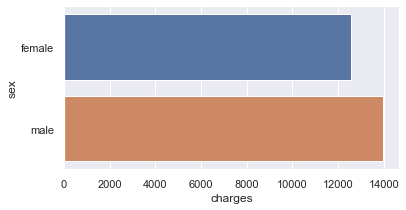

In [41]:
plt.figure(figsize=(6,3))
sns.barplot(y='sex', x='charges', data=df,ci=None)

#The insurance charges is higher for male compared to female

<AxesSubplot:xlabel='charges', ylabel='smoker'>

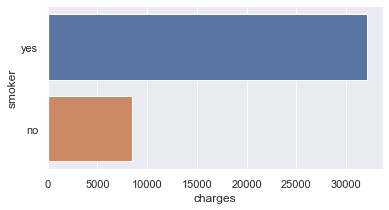

In [42]:
plt.figure(figsize=(6,3))
sns.barplot(y='smoker', x='charges', data=df,ci=None)

In [43]:
#From the above barplot it is obvious than the insurance charges for smokers are very high

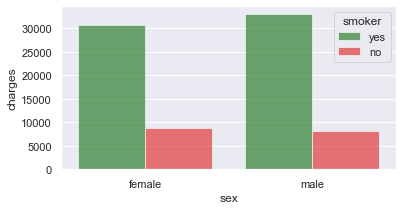

In [44]:
plt.figure(figsize=(6,3))
sns.barplot(x='sex',y='charges',data=df,hue='smoker',palette=['green','red'],alpha=0.6,ci=None);

In [45]:
#Hence the male smokers are having to face more charges for their insurance

<AxesSubplot:xlabel='age', ylabel='charges'>

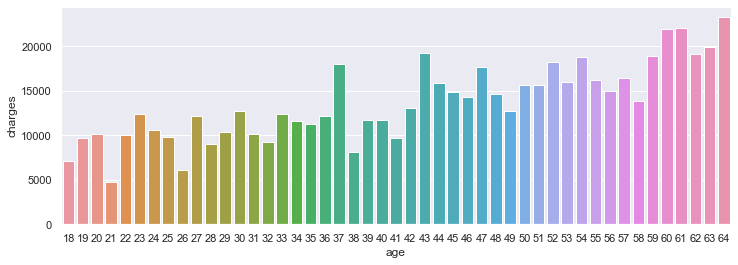

In [46]:
plt.figure(figsize=(12,4))
sns.barplot(y='charges', x='age', data=df,ci=None)

In [47]:
#People of age more than 60 years are having more insurance charges

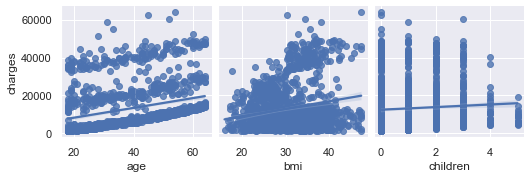

In [48]:
sns.pairplot(df, x_vars=['age', 'bmi', 'children'], y_vars='charges', kind='reg')
plt.show()

Smoking has the highest impact on medical costs, even though the costs are growing with age, bmi and children. Also people who have children generally smoke less, which the following violinplots shows too

<AxesSubplot:xlabel='children', ylabel='charges'>

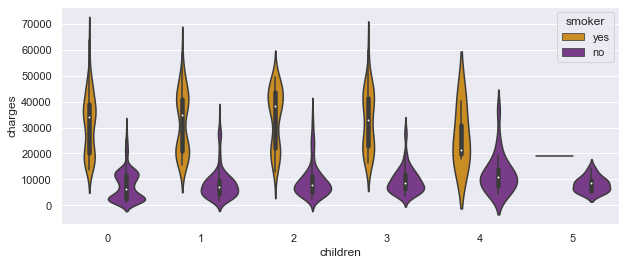

In [49]:
plt.subplots(1, 1, figsize=(10, 4))
sns.violinplot(x = 'children', y = 'charges', data=df,
                 orient='v', hue='smoker', palette='CMRmap_r',ci=None)

## Do charges of people who smoke differ significantly from the people who don't?

<AxesSubplot:xlabel='smoker', ylabel='charges'>

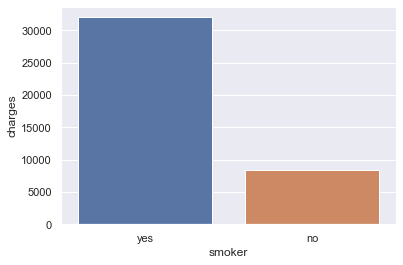

In [50]:
sns.barplot(x='smoker',y='charges',data=df,ci=None)

# Check Correlation

To find out the correlation we will use the corr function and also we will plot a heatmap to visualise this correlation.

<AxesSubplot:>

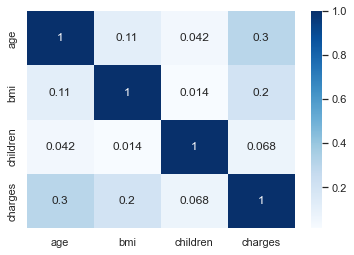

In [51]:
sns.heatmap(corelation,annot=True,cmap='Blues')

In [52]:
#cor(x,y) = cov(x,y)/Sx*Sy
50874.802298/(14.04*12110)

0.2992205959732839

In [53]:
df.age.std()

14.049960379216172

In [54]:
df.charges.std()

12110.011236693994

## Does bmi of males differ significantly from that of females?

In [55]:
df.groupby('sex')['charges'].median()

sex
female    9412.96250
male      9369.61575
Name: charges, dtype: float64

In [56]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# One hot coding

In [57]:
# if we have more than two categoric data then we go for one hot coding

df=pd.get_dummies(df,columns=['region'],drop_first=True)

# Label encoding

In [58]:
df['sex']=pd.Categorical(df['sex']).codes
df['smoker']=pd.Categorical(df['smoker']).codes

In [59]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [60]:
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

# for randomized data splitting
from sklearn.model_selection import train_test_split

# to build linear regression model
import statsmodels.api as sm

#to check model perfomance 
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [61]:
df[['age','bmi']]=df[['age','bmi']].apply(zscore)

In [62]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,1328,1329,1330,1331,1332,1333,1334,1335,1336,1337
age,-1.438764,-1.509965,-0.797954,-0.441948,-0.513149,-0.584350,0.483668,-0.157143,-0.157143,1.480485,...,-1.153959,0.910875,1.266881,-1.153959,0.910875,0.768473,-1.509965,-1.509965,-1.296362,1.551686
sex,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
bmi,-0.454201,0.515300,0.388125,-1.312218,-0.292342,-0.810951,0.460796,-0.480627,-0.135438,-0.794435,...,-1.061171,1.313032,-0.810951,0.454190,2.320520,0.052846,0.209750,1.023999,-0.801041,-0.260961
children,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.000000,0.000000,...,2.000000,2.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000
smoker,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
charges,16884.924000,1725.552300,4449.462000,21984.470610,3866.855200,3756.621600,8240.589600,7281.505600,6406.410700,28923.136920,...,22395.744240,10325.206000,12629.165600,10795.937330,11411.685000,10600.548300,2205.980800,1629.833500,2007.945000,29141.360300
region_northwest,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
region_southeast,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
region_southwest,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000


In [63]:
# separate Independent and Dependent Var into X and Y
# X will contain all the independent variable and y will have the dependent variable
x=df.drop(['charges'],axis=1)
y=df[['charges']]

In [64]:
# Train test Split (70:30)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [65]:
x_train.shape

(936, 8)

In [66]:
x_test.shape

(402, 8)

# Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
regression_model=LinearRegression()
regression_model.fit(x_train,y_train)

LinearRegression()

In [69]:
regression_model+.coef_[0]

array([ 3526.89614655,  -273.95081553,  1973.24612639,   343.17102854,
       24062.27662857,  -304.03684461,  -932.40966231,  -872.60695781])

In [70]:
for idx,col_name in enumerate(x_train.columns):
    print('The coeff for {} is {}'.format(col_name,regression_model.coef_[0][idx]))

The coeff for age is 3526.8961465468037
The coeff for sex is -273.95081553418663
The coeff for bmi is 1973.246126394463
The coeff for children is 343.1710285369853
The coeff for smoker is 24062.276628568496
The coeff for region_northwest is -304.0368446137411
The coeff for region_southeast is -932.4096623100762
The coeff for region_southwest is -872.6069578138638


In [71]:
regression_model.intercept_[0]

8711.383045425777

In [72]:
regression_model.score(x_train,y_train)

0.7546391460846524

In [73]:
regression_model.score(x_test,y_test)

0.740729938826683

In [74]:
# Model is stable but performance is very low

In [75]:
predicted_train=regression_model.predict(x_train)
predicted_test=regression_model.predict(x_test)

In [76]:
# MSE on train data
MSE_train=mean_squared_error(y_train,predicted_train)
MSE_train

36464396.71375472

In [77]:
# RMSE on train data
RMSE_train=np.sqrt(mean_squared_error(y_train,predicted_train))
RMSE_train

6038.5757189717115

In [78]:
# MSE on train data
MSE_test=mean_squared_error(y_test,predicted_test)
MSE_test

36742890.45685958

In [79]:
# RMSE on train data
RMSE_test=np.sqrt(mean_squared_error(y_test,predicted_test))
RMSE_test

6061.591412893117

In [80]:
from sklearn.metrics import mean_absolute_percentage_error

In [81]:
# MAPE
mean_absolute_percentage_error(y_train,predicted_train)

0.42299455342249864

In [82]:
mean_absolute_percentage_error(y_test,predicted_test)

0.4143208988909958

In [83]:
# As MAPE value is too high, It's considered to be a not so good model

In [84]:
df.corr()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
age,1.000000,-0.020856,0.111930,0.042469,-0.025019,0.299008,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.044802,0.017163,0.076185,0.057292,-0.011156,0.017117,-0.004184
bmi,0.111930,0.044802,1.000000,0.013700,0.003146,0.198997,-0.135672,0.268556,-0.005087
children,0.042469,0.017163,0.013700,1.000000,0.007673,0.067998,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003146,0.007673,1.000000,0.787251,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198997,0.067998,0.787251,1.000000,-0.039905,0.073982,-0.043210
region_northwest,-0.000407,-0.011156,-0.135672,0.024806,-0.036945,-0.039905,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.017117,0.268556,-0.023066,0.068498,0.073982,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.004184,-0.005087,0.021914,-0.036945,-0.043210,-0.320829,-0.346265,1.000000


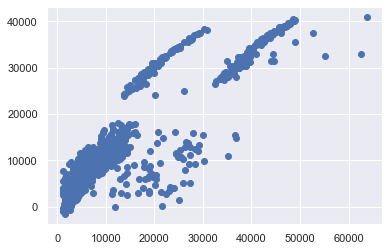

In [85]:
plt.scatter(y_train,predicted_train)

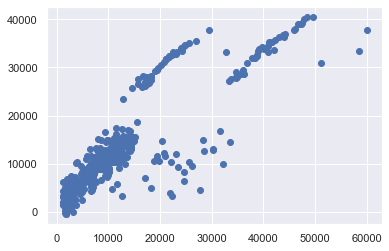

In [86]:
plt.scatter(y_test,predicted_test)

### Stats Model

In [87]:
# Concate X and Y
data_train=pd.concat([x_train,y_train],axis=1)
data_test=pd.concat([x_test,y_test],axis=1)

In [88]:
import statsmodels.formula.api as smf

In [89]:
expr='charges ~ age+sex+bmi+children+smoker+region_northwest+region_southeast+region_southwest'

In [90]:
lm1=smf.ols(formula=expr,data=data_train).fit()

In [91]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     356.4
Date:                Mon, 17 Apr 2023   Prob (F-statistic):          1.08e-276
Time:                        21:21:03   Log-Likelihood:                -9476.9
No. Observations:                 936   AIC:                         1.897e+04
Df Residuals:                     927   BIC:                         1.902e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         8711.3830    500.126  

R-squared and Adj. R-squared are nearly equal. So, we can call it a stable model. But, as Its value nearly equal to 75% we can't call it's a good model.

In [92]:
# MSE on train
mean_squared_error(lm1.predict(data_train.drop('charges',axis=1)),data_train['charges'])

36464396.71375471

In [93]:
# RMSE Test
mean_squared_error(lm1.predict(data_train.drop('charges',axis=1)),data_train['charges'],squared=False)

6038.575718971711

In [94]:
# MSE on train
mean_squared_error(lm1.predict(data_test.drop('charges',axis=1)),data_test['charges'])

36742890.456859596

In [95]:
# # RMSE Test
mean_squared_error(lm1.predict(data_test.drop('charges',axis=1)),data_test['charges'],squared=False)

6061.591412893119

# Ridge & Lasso Regression

In [96]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [97]:
ridge_model=Ridge(alpha=0.1)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.1)

In [98]:
for idx,col_name in enumerate(x_train.columns):
    print('The coeff for {} is {}'.format(col_name,ridge_model.coef_[0][idx]))

The coeff for age is 3526.495839914059
The coeff for sex is -272.9625846099941
The coeff for bmi is 1972.9450224049112
The coeff for children is 343.1171401422628
The coeff for smoker is 24046.464232499126
The coeff for region_northwest is -303.459941648762
The coeff for region_southeast is -930.6084356131375
The coeff for region_southwest is -871.5732315303007


In [99]:
ridge_model.score(x_train,y_train)

0.7546388691131204

In [100]:
ridge_model.score(x_test,y_test)

0.7407514536846528

In [101]:
# Lasso Regression Model---------L2
Lasso_model=Lasso(alpha=0.0001)    # Learning rate= tol=0.0001
Lasso_model.fit(x_train,y_train)

Lasso(alpha=0.0001)

In [102]:
for idx,col_name in enumerate(x_train.columns):
    print('The coeff for {} is {}'.format(col_name,Lasso_model.coef_[idx]))

The coeff for age is 3526.8960609340847
The coeff for sex is -273.9503081222293
The coeff for bmi is 1973.245902882382
The coeff for children is 343.17093811466833
The coeff for smoker is 24062.27600432565
The coeff for region_northwest is -304.03511709341507
The coeff for region_southeast is -932.407847178973
The coeff for region_southwest is -872.60522798756


In [103]:
Lasso_model.score(x_train,y_train)

0.7546391460846478

In [104]:
Lasso_model.score(x_test,y_test)

0.740729937768835

# VIF - Variance Infaltion Factor

In [105]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [106]:
x.values

array([[-1.43876426,  0.        , -0.45420102, ...,  0.        ,
         0.        ,  1.        ],
       [-1.50996545,  1.        ,  0.51529985, ...,  0.        ,
         1.        ,  0.        ],
       [-0.79795355,  1.        ,  0.38812512, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.50996545,  0.        ,  1.02399878, ...,  0.        ,
         1.        ,  0.        ],
       [-1.29636188,  0.        , -0.8010412 , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.55168573,  0.        , -0.2609615 , ...,  1.        ,
         0.        ,  0.        ]])

In [107]:
x.shape[1]

8

In [109]:
#Variable having VIF>10 are causing multicolinearity
VIF=[variance_inflation_factor(x.values,ix) for ix in range(x.shape[1])]
i=0
for column in x.columns:
    if i<10:
        print(column,VIF[i])
        i=i+1

age 1.0172517155172904
sex 1.7276329710022946
bmi 1.0894238500263063
children 1.6171413000944357
smoker 1.2349638036669421
region_northwest 1.3404356004807794
region_southeast 1.4612111423444158
region_southwest 1.3329706938450583


Comparison Between Real Insurance Price and Prediction Price

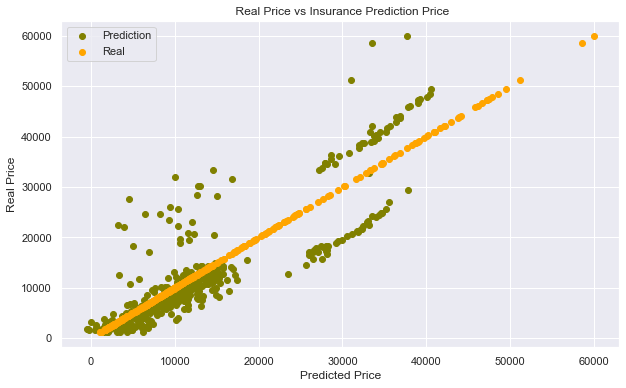

In [110]:
y_pred = regression_model.predict(x_test)

plt.figure(figsize=(10,6))
plt.scatter(y_pred, y_test, c='olive', label='Prediction')
plt.scatter(y_test, y_test, c='orange', label='Real')
plt.title(' Real Price vs Insurance Prediction Price')
plt.xlabel('Predicted Price')
plt.ylabel('Real Price')
plt.grid(True)
plt.legend()
plt.show()